Paper: "A conjoint analysis of landholder preferences for reward-based land-management
contracts in Kapingazi watershed, Eastern Mount Kenya"

Author(s): Bedru Babulo Balana, Thomas Yatich, and Miika Mäkelä

Year: 2011

Model(s): Binary Logit

Main findings: \_\_\_\_

# Import needed libraries

In [1]:
import sys

import scipy.stats

import numpy as np
import pandas as pd

import seaborn as sbn
import matplotlib.pyplot as plt

from statsmodels.formula.api import logit

sys.path.insert(0, '/Users/timothyb0912/Documents/pylogit/')
import pylogit as pl

sys.path.insert(0, '../../src/')
from visualization import predictive_viz as viz

%matplotlib inline

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Import data

In [2]:
data_path =\
    '../../data/raw/balana_2011/balana_2011_data4binary_logit.tab'
df = pd.read_table(data_path, sep='\t')

# Look at data

In [3]:
df.shape

(972, 116)

In [4]:
df.head().T

,0,1,2,3,4
Res_ID,KI34,KI34,KI34,KI34,KI34
sur_point,8,8,8,8,8
date,13,13,13,13,13
FDA,Kiriari,Kiriari,Kiriari,Kiriari,Kiriari
sex,0,0,0,0,0
age,70,70,70,70,70
m_activity,10,10,10,10,10
write_read,1,1,1,1,1
schooling,22,22,22,22,22
adult,10,10,10,10,10


In [5]:
df.Res_ID.describe()

count      972
unique     105
top       KI09
freq        18
Name: Res_ID, dtype: object

In [6]:
set(df.columns.tolist())

{'Agri_Income',
 'BinaryChoice',
 'CL_access',
 'CommitPeriod15yrs',
 'CommitPeriod30yrs',
 'FDA',
 'FreeLabour2dys',
 'FreeLabour3dys',
 'HarvestNotPermitted',
 'HarvestPartial',
 'L_quality',
 'LandArea20precent',
 'LandArea40percent',
 'LandSize',
 'LocalAdminCFA',
 'LocalAdminFDAC',
 'MKEPP',
 'No_reason1',
 'No_reason2',
 'No_reason3',
 'NonAgri_income',
 'NrmAgri_Income',
 'NrmNonAgri_income',
 'Rating',
 'Res_ID',
 'RewardElectricity',
 'RewardExtensionFee',
 'RewardWater',
 'Totincome',
 'adult',
 'age',
 'agro_forest',
 'calve',
 'calve_value',
 'camel',
 'camel_value',
 'chick_value',
 'chicken',
 'child',
 'cow',
 'cow_value',
 'crop_income',
 'date',
 'debit',
 'donk_value',
 'donkey',
 'edu_AboveSec',
 'edu_primary',
 'edu_secondary',
 'env_info',
 'env_mgt',
 'far_union',
 'fina_access',
 'free_labour',
 'goat',
 'goat_value',
 'harvest_right',
 'hhsize',
 'horse',
 'horse_value',
 'labour_fam1',
 'labour_fam2',
 'labour_fam3',
 'labour_fam4',
 'labour_fam5',
 'labour_fam

# Clean data

In [7]:
clean_df = df

# Compute needed transformations / derived features

# Define the model specification and parameter names

# Set model parameters

In [8]:
choice_col = 'BinaryChoice'

In [9]:
explanatory_vars =\
    ['LandArea20precent',
     'LandArea40percent',
     'CommitPeriod15yrs',
     'CommitPeriod30yrs',
     'HarvestNotPermitted',
     'HarvestPartial',
     'RewardExtensionFee',
     'RewardElectricity',
     'RewardWater',
     'LocalAdminFDAC',
     'LocalAdminCFA',
     'FreeLabour2dys',
     'FreeLabour3dys',
     'sex',
     'age',
     'env_mgt',
     'MKEPP',
     'fina_access',
     'env_info',
     'edu_primary',
     'edu_secondary',
     'edu_AboveSec',
     'hhsize',
     'LandSize',
     'NrmAgri_Income',
     'NrmNonAgri_income'
    ]

missing_vars =\
    [x for x in explanatory_vars if x not in df.columns]
if len(missing_vars) > 0:
    msg = 'These explanatory variables are not in the data file:'
    raise ValueError(msg + '\n' + missing_vars)

model_formula =\
    choice_col + ' ~ ' + ' + '.join(explanatory_vars)

# Create the model object

In [10]:
# model_obj =\
#     pl.create_choice_model(clean_df,
#                            alt_id_col,
#                            obs_id_col,
#                            choice_col,
#                            model_spec,
#                            model_type,
#                            names=model_names)

model_obj = logit(model_formula, clean_df)

# Estimate and view the model

In [11]:
model_res = model_obj.fit()

Optimization terminated successfully.
         Current function value: 0.394683
         Iterations 7


In [12]:
print(model_res.summary2())

                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.221     
Dependent Variable:   BinaryChoice     AIC:              821.2635  
Date:                 2019-01-11 03:44 BIC:              953.0061  
No. Observations:     972              Log-Likelihood:   -383.63   
Df Model:             26               LL-Null:          -492.70   
Df Residuals:         945              LLR p-value:      2.8458e-32
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept            1.7021   0.7625  2.2324 0.0256  0.2077  3.1965
LandArea20precent   -0.9951   0.2115 -4.7061 0.0000 -1.4095 -0.5807
LandArea40percent   -2.2900   0.2792 -8.2019 0.0000 -2.8373 -1.7428
CommitP

# Set checking parameters

In [13]:
NUM_SAMPLES = 200

# Sample from the posterior or approximate sampling distribution of model parameters

In [14]:
# Get the covariance matrix of the asymptotic sampling distribution
hessian = model_res.model.hessian(model_res.params)
asym_cov = np.linalg.inv(-1 * hessian)

# Create a representation of the asymptotic sampling distribution
asym_dist = scipy.stats.multivariate_normal(mean=model_res.params,
                                            cov=asym_cov)

# Sample from the asymptotic sampling distribution
parameter_samples = asym_dist.rvs(NUM_SAMPLES)

In [15]:
parameter_samples.shape

(200, 27)

# Generate posterior predictive datasets

In [16]:
# Get posterior predicted probabilities
posterior_logits =\
    np.clip(np.dot(model_res.model.exog, parameter_samples.T),
            -300, 300)
posterior_probs = 1.0 / (1 + np.exp(-1 * posterior_logits))

In [17]:
posterior_probs.shape

(972, 200)

In [18]:
# Determine the number of choice observations
num_obs = posterior_probs.shape[0]

# Get posterior simulated datasets
simulated_choices =\
    viz.simulate_choice_vector(posterior_probs,
                               np.arange(1, num_obs + 1),
                               wide_binary=True,
                               rseed=910)

# Save all model generated data

In [19]:
# Save posterior parameter samples

# Save posterior predictive datasets

# Determine the measurement scales of the explanatory variables

In [20]:
print('Number of unique values per column:')
unique_values_per_variable =\
    clean_df[explanatory_vars].agg(lambda x: x.unique().size,
                                   axis='index')
    
print(unique_values_per_variable)

Number of unique values per column:
LandArea20precent       2
LandArea40percent       2
CommitPeriod15yrs       2
CommitPeriod30yrs       2
HarvestNotPermitted     2
HarvestPartial          2
RewardExtensionFee      2
RewardElectricity       2
RewardWater             2
LocalAdminFDAC          2
LocalAdminCFA           2
FreeLabour2dys          2
FreeLabour3dys          2
sex                     2
age                    38
env_mgt                 2
MKEPP                   2
fina_access             2
env_info                2
edu_primary             2
edu_secondary           2
edu_AboveSec            2
hhsize                 13
LandSize               27
NrmAgri_Income         64
NrmNonAgri_income      42
dtype: int64


In [21]:
# Determine which variables are continuous and which are binary
continuous_variables =\
    (unique_values_per_variable[unique_values_per_variable > 2]
                               .index.tolist())

binary_variables =\
    (unique_values_per_variable[unique_values_per_variable == 2]
                               .index.tolist())

# <font color=darkred> Should place all checking related cells in a second notebook.</font>

# Perform the desired posterior predictive checks

### 1. Log-Likelihood plot

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


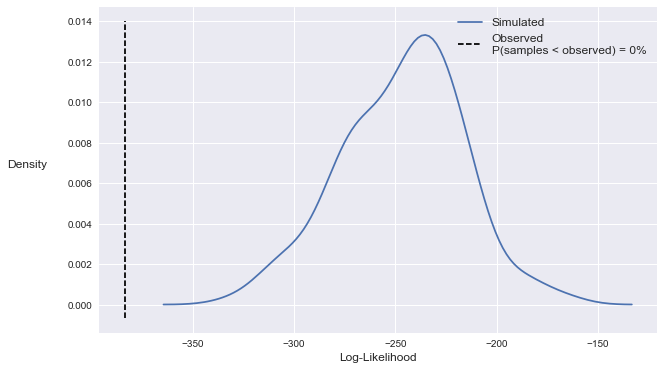

In [22]:
# Create a needed attribute for the predictive log-likelihoods
setattr(model_res, 'long_fitted_probs', model_res.predict())

# Generate the simulated log-likelihoods
sim_log_likes =\
    viz.compute_prior_predictive_log_likelihoods(simulated_choices,
                                                 clean_df,
                                                 "BinaryChoice",
                                                 model_res)

# Plot the simulated versus observed log-likelihood
log_like_path = None
viz.plot_predicted_log_likelihoods(sim_log_likes,
                                   model_res.llf,
                                   output_file=log_like_path)

### 2. Outcome Boxplot

Unique x-values: 100%|██████████| 1/1 [00:00<00:00, 125.63it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


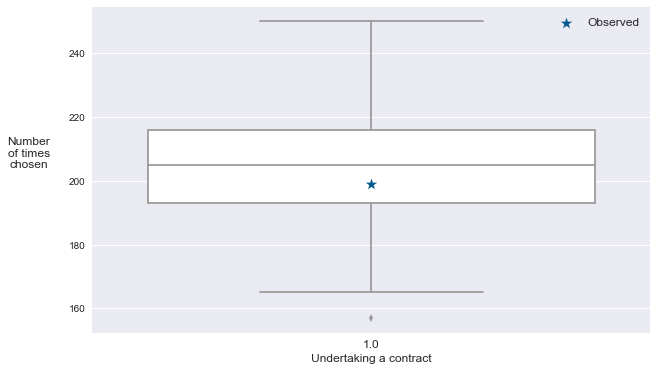

In [23]:
market_path = None

viz.plot_simulated_market_shares(np.ones(num_obs),
                                 simulated_choices,
                                 clean_df.BinaryChoice.values,
                                 x_label='Undertaking a contract',
                                 y_label='Number\nof times\nchosen',
                                 output_file=market_path)

### 3. Binned Reliability Plot

Plotting: 100%|██████████| 1/1 [00:00<00:00, 253.80it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


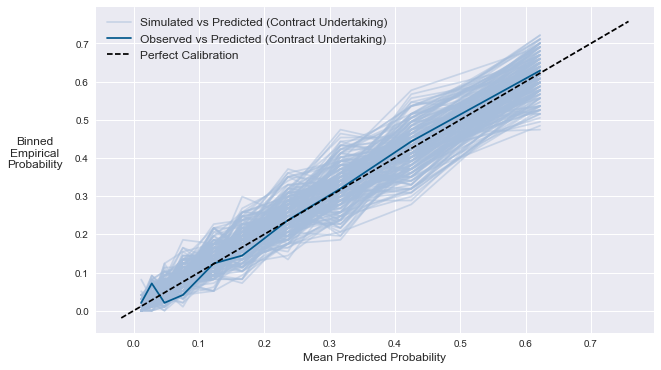

In [24]:
reload(viz)
current_alt = 'Contract Undertaking'
current_probs = model_res.long_fitted_probs
current_choices = clean_df.BinaryChoice.values
current_sim_y = simulated_choices
current_line_label = 'Observed vs Predicted ({})'.format(current_alt)
current_sim_label = 'Simulated vs Predicted ({})'.format(current_alt)

current_sim_color = '#a6bddb'
current_obs_color = '#045a8d'

viz.plot_binned_reliability(
    current_probs,
    current_choices,
    sim_y=current_sim_y,
    line_label=current_line_label,
    line_color=current_obs_color,
    sim_label=current_sim_label,
    sim_line_color=current_sim_color,
    figsize=(10, 6),
    ref_line=True,
    output_file=None)

### 4. 'Bagged' Reliability Plot

Plotting: 100%|██████████| 200/200 [00:31<00:00,  6.62it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


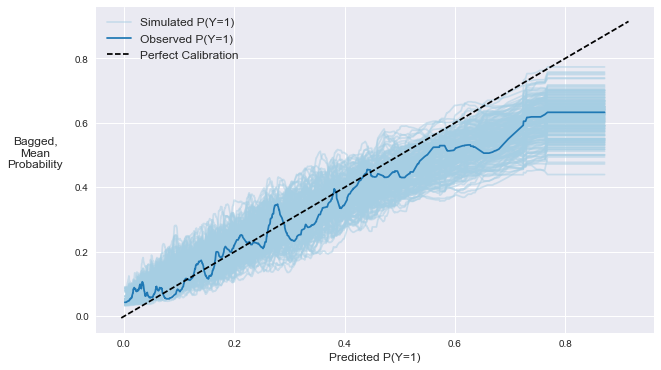

In [25]:
current_probs = model_res.long_fitted_probs
current_choices = clean_df.BinaryChoice.values
current_sim_y = simulated_choices

filename = None

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
fig_and_ax = [fig, ax]
viz.make_bagged_marginal_model_plot(current_sim_y,
                                    current_choices,
                                    current_probs,
                                    y_label='Observed P(Y=1)',
                                    prob_label='Simulated P(Y=1)',
                                    x_label='Predicted P(Y=1)',
                                    alpha=0.5,
                                    fig_and_ax=fig_and_ax,
                                    output_file=filename)

# Determine the maximum value of the x-axis or y-axis
max_ref_val = max(ax.get_xlim()[1], ax.get_ylim()[1])
min_ref_val = max(ax.get_xlim()[0], ax.get_ylim()[0])
# Determine the values to use to plot the reference line
ref_vals = np.linspace(min_ref_val, max_ref_val, num=100)
# Plot the reference line as a black dashed line
ax.plot(ref_vals, ref_vals, 'k--', label='Perfect Calibration')
ax.legend(loc='best', fontsize=12);

### 5. Binned marginal model plots

Plotting: 100%|██████████| 200/200 [00:00<00:00, 489.45it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Plotting: 100%|██████████| 200/200 [00:00<00:00, 398.09it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Plotting: 100%|██████████| 200/200 [00:00<00:00, 542.20it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Plotting: 100%|██████████| 200/200 [00:00<00:00, 342.87it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402

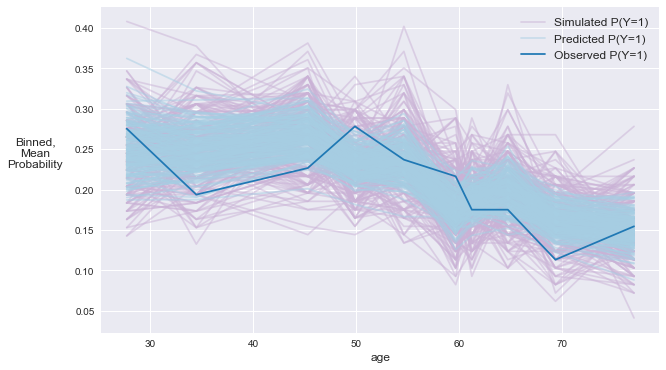

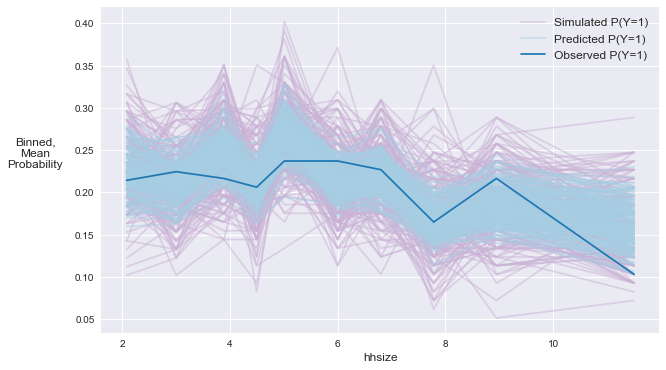

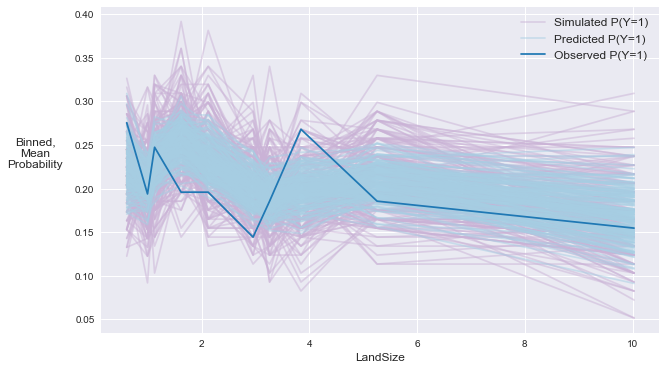

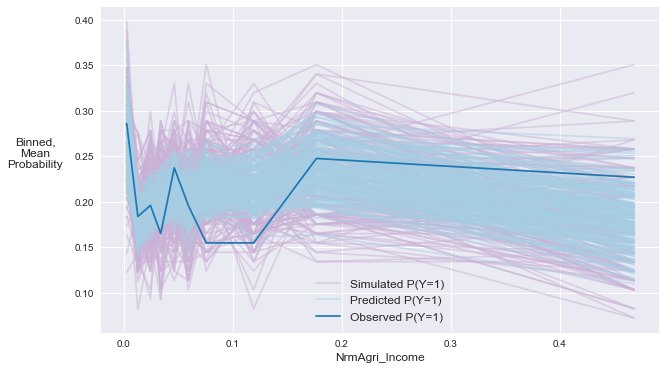

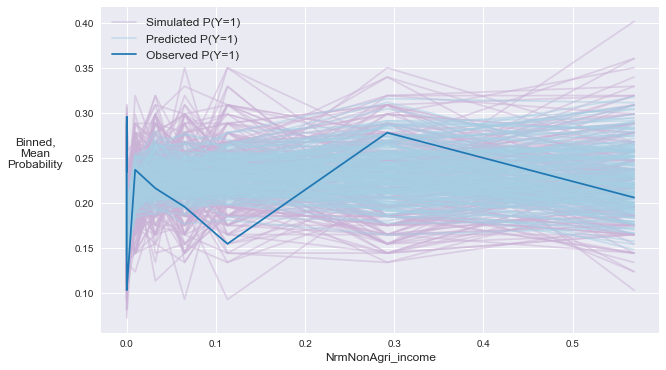

In [26]:
current_probs = posterior_probs
current_y = clean_df.BinaryChoice.values
current_sim_y = simulated_choices

for col in continuous_variables:
    current_x = clean_df[col].values
    filename = None

    viz.make_binned_marginal_model_plot(current_probs,
                                        current_y,
                                        current_x,
                                        partitions=10,
                                        sim_y=current_sim_y,
                                        y_label='Observed P(Y=1)',
                                        prob_label='Predicted P(Y=1)',
                                        sim_label='Simulated P(Y=1)',
                                        x_label=col,
                                        alpha=0.5,
                                        figsize=(10, 6),
                                        output_file=filename)

### 6. Bagged marginal model plots

#### 6a. Check the relationships with the raw explanatory variables

Plotting: 100%|██████████| 200/200 [00:27<00:00,  7.38it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Plotting: 100%|██████████| 200/200 [00:26<00:00,  7.32it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Plotting: 100%|██████████| 200/200 [00:26<00:00,  7.28it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Plotting: 100%|██████████| 200/200 [00:27<00:00,  6.87it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: Us

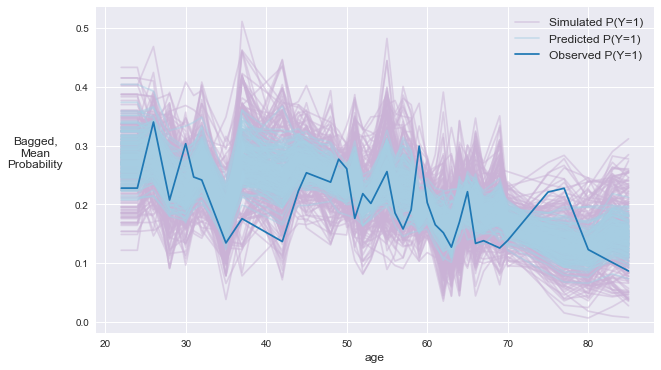

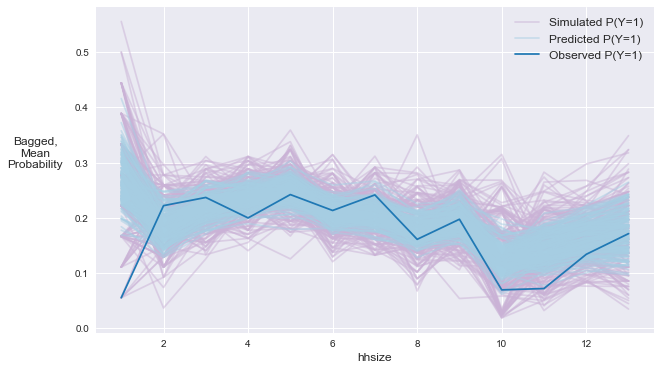

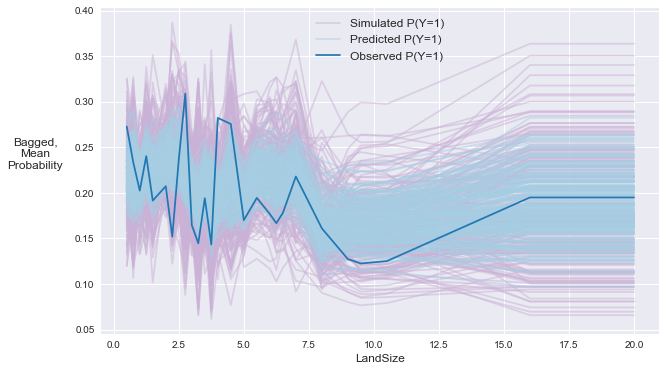

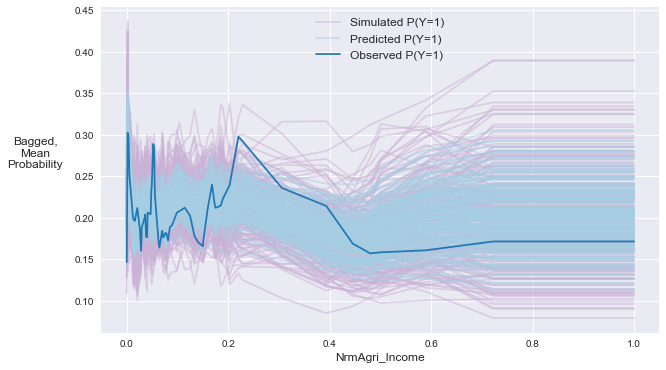

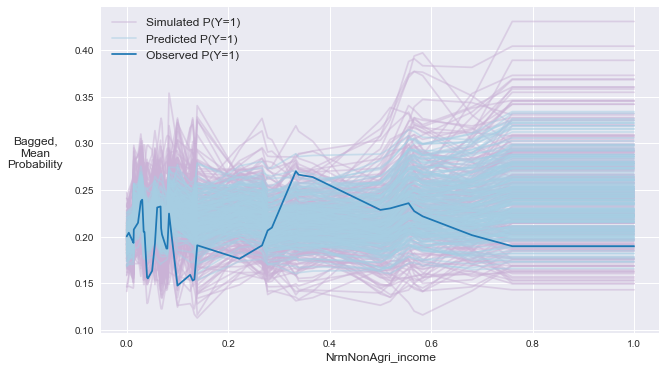

In [27]:
current_probs = posterior_probs
current_y = clean_df.BinaryChoice.values
current_sim_y = simulated_choices

for col in continuous_variables:
    current_x = clean_df[col].values
    filename = None

    viz.make_bagged_marginal_model_plot(current_probs,
                                        current_y,
                                        current_x,
                                        sim_y=current_sim_y,
                                        y_label='Observed P(Y=1)',
                                        prob_label='Predicted P(Y=1)',
                                        sim_label='Simulated P(Y=1)',
                                        x_label=col,
                                        alpha=0.5,
                                        figsize=(10, 6),
                                        output_file=filename)

#### 6b. Check the relationship with the estimated index, $V = X \beta$

Plotting: 100%|██████████| 200/200 [00:27<00:00,  7.38it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


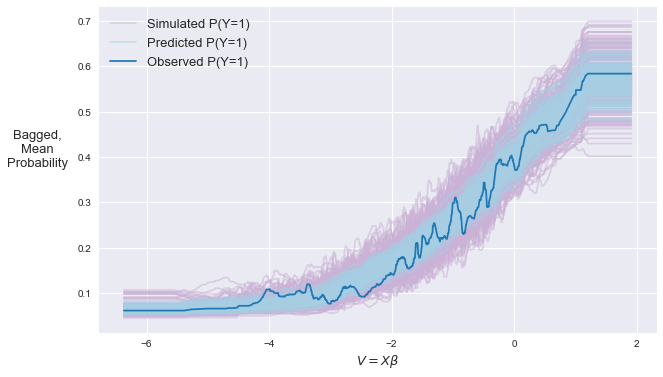

In [28]:
current_probs = posterior_probs
current_y = clean_df.BinaryChoice.values
current_sim_y = simulated_choices
current_x = model_res.fittedvalues.values
filename = None

viz.make_bagged_marginal_model_plot(current_probs,
                                    current_y,
                                    current_x,
                                    sim_y=current_sim_y,
                                    y_label='Observed P(Y=1)',
                                    prob_label='Predicted P(Y=1)',
                                    sim_label='Simulated P(Y=1)',
                                    x_label=r'$V = X \beta$',
                                    alpha=0.5,
                                    figsize=(10, 6),
                                    fontsize=13,
                                    output_file=filename)

### 7. Simulated KDEs

Calculating KDEs: 100%|██████████| 100/100 [00:00<00:00, 195.34it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Calculating KDEs: 100%|██████████| 100/100 [00:00<00:00, 214.13it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Calculating KDEs: 100%|██████████| 100/100 [00:00<00:00, 149.91it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Calculating KDEs: 100%|██████████| 100/100 [00:00<00:00, 213.04it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-p

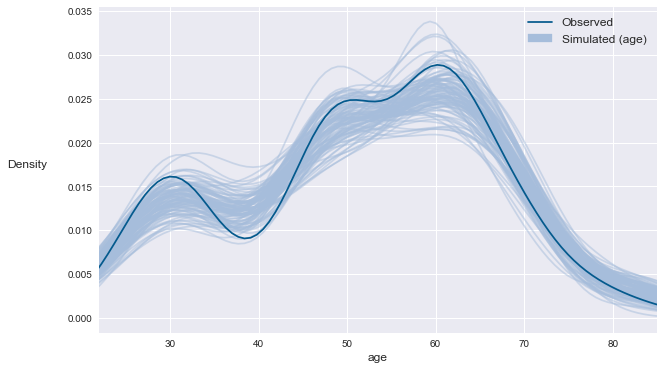

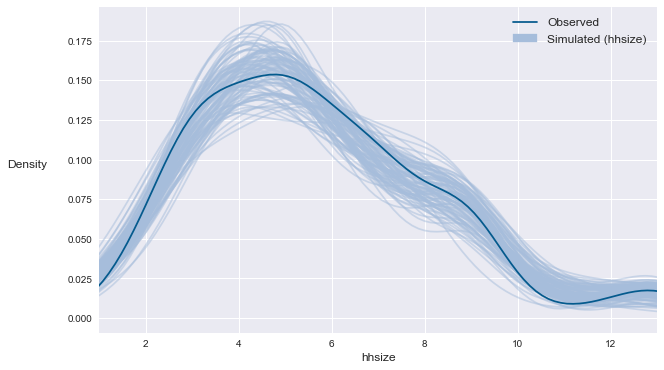

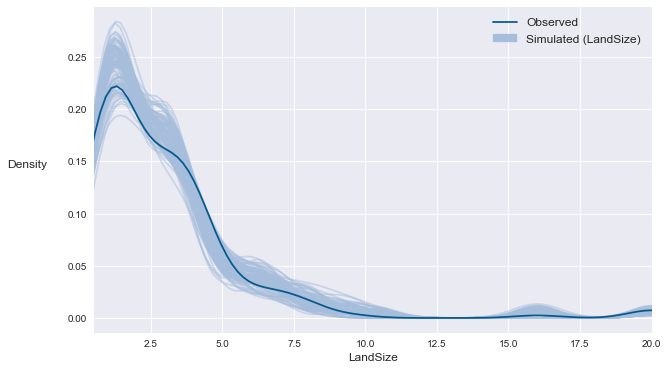

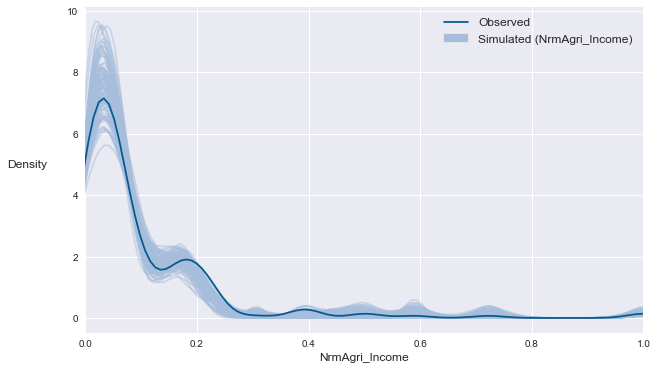

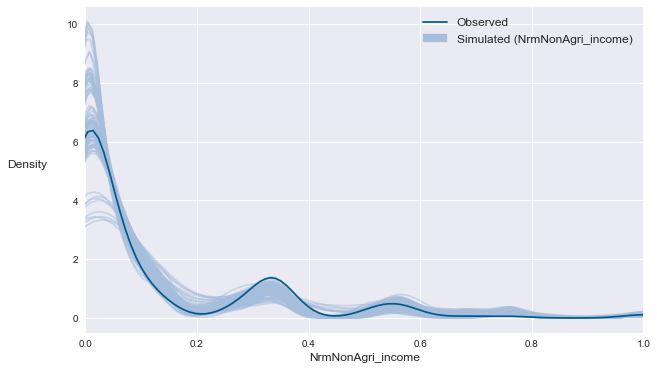

In [32]:
filter_row = np.ones(num_obs).astype(bool)
current_title = ''
filename = None

for col in continuous_variables:
    viz.plot_simulated_kde_traces(simulated_choices,
                                  clean_df,
                                  filter_row,
                                  col,
                                  'BinaryChoice',
                                  label='Simulated ({})'.format(col),
                                  title=current_title,
                                  figsize=(10, 6),
                                  output_file=filename)

### 8. Simulated CDFs

Calculating CDFs: 100%|██████████| 200/200 [00:00<00:00, 440.49it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Calculating CDFs: 100%|██████████| 200/200 [00:00<00:00, 360.22it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Calculating CDFs: 100%|██████████| 200/200 [00:00<00:00, 356.37it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Calculating CDFs: 100%|██████████| 200/200 [00:00<00:00, 392.74it/s]
/Users/timothyb0912/anaconda/lib/python2.7/site-p

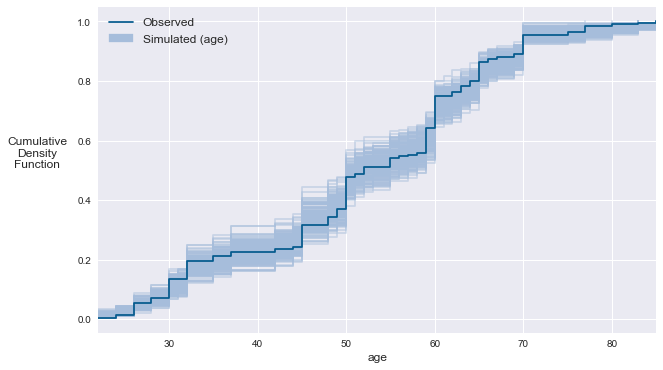

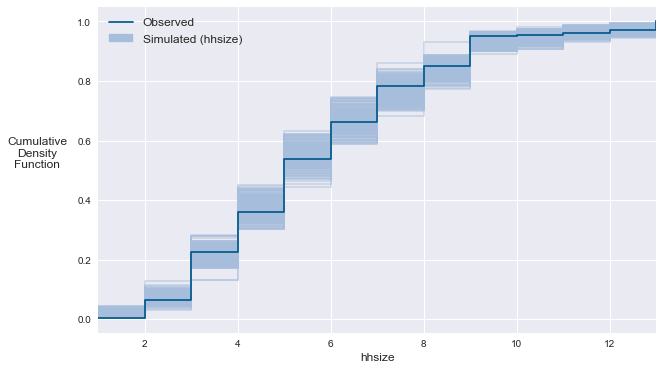

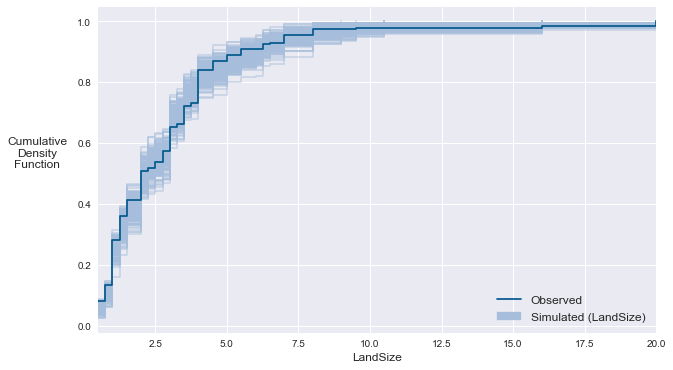

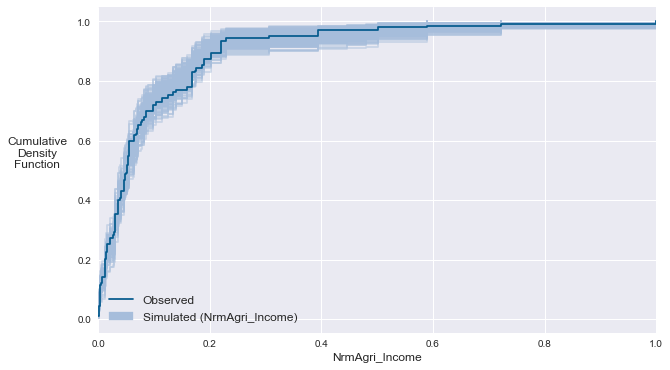

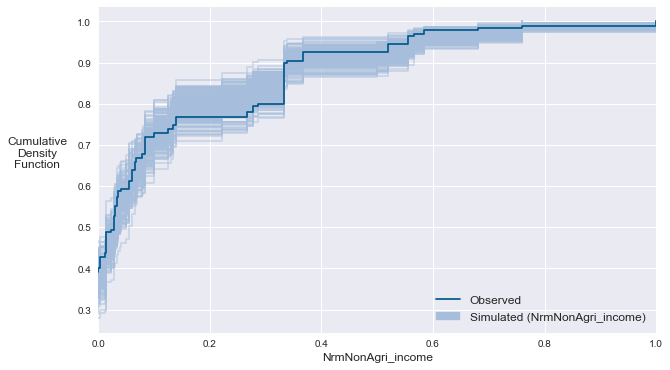

In [31]:
filter_row = np.ones(num_obs).astype(bool)
current_title = ''
filename = None

for col in continuous_variables:
    viz.plot_simulated_cdf_traces(simulated_choices,
                                  clean_df,
                                  filter_row,
                                  col,
                                  'BinaryChoice',
                                  label='Simulated ({})'.format(col),
                                  title=current_title,
                                  figsize=(10, 6),
                                  output_file=filename)

### 9. Simulated Histograms

Automatic pdb calling has been turned ON


/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matp

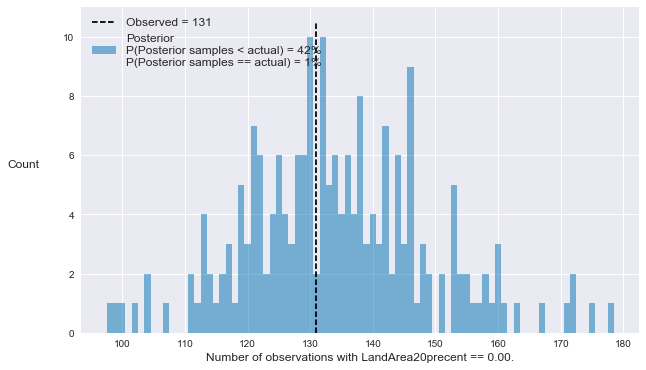

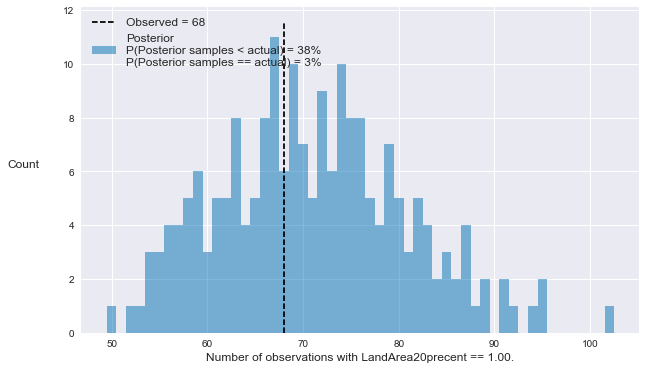

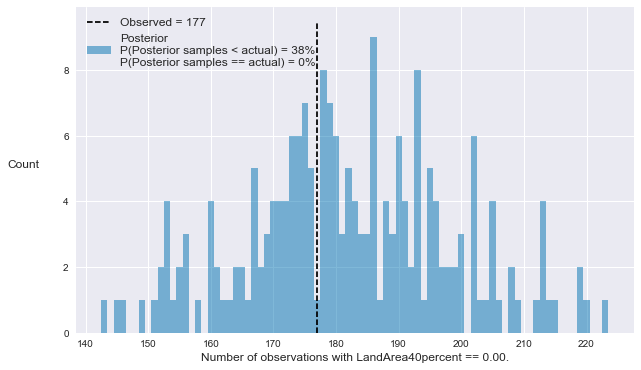

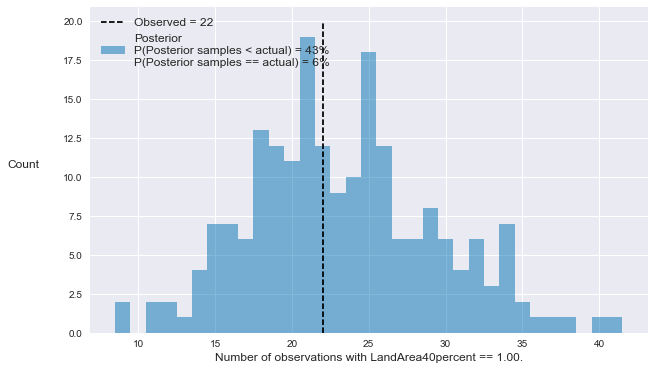

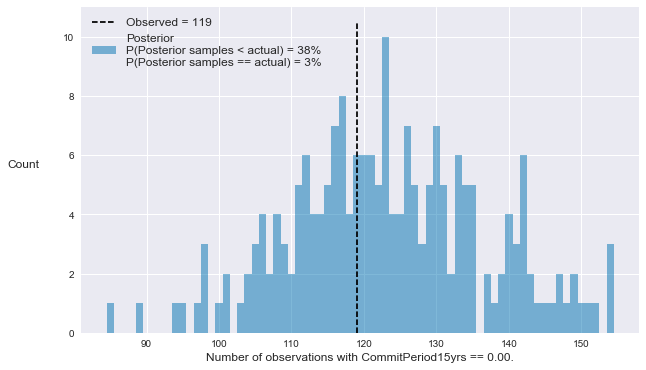

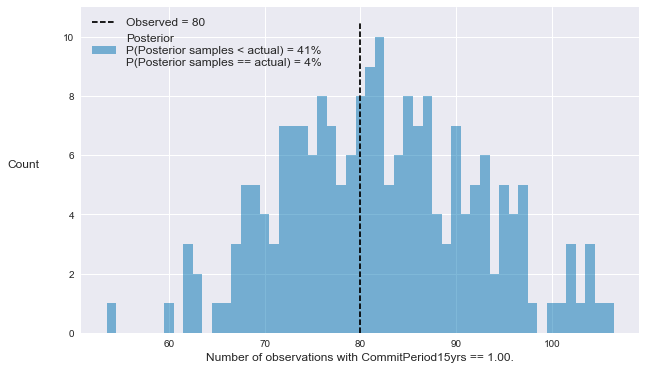

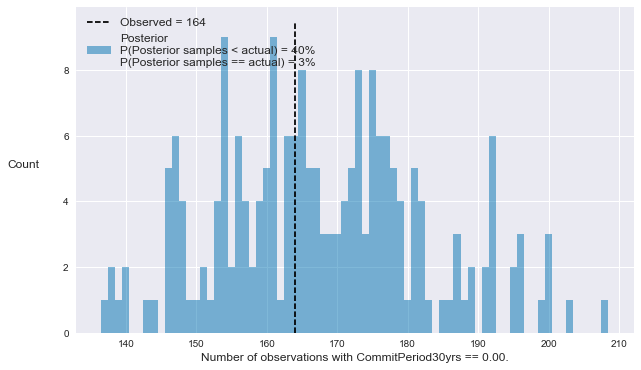

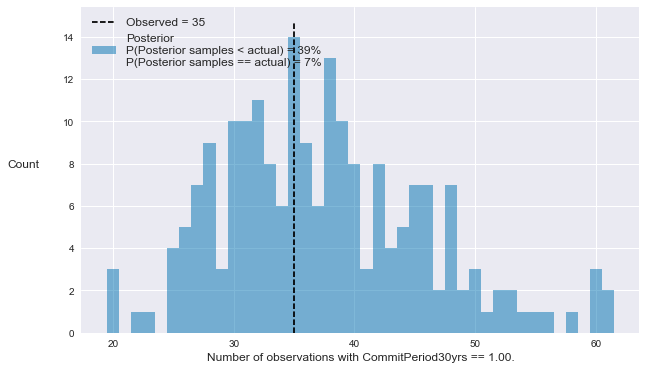

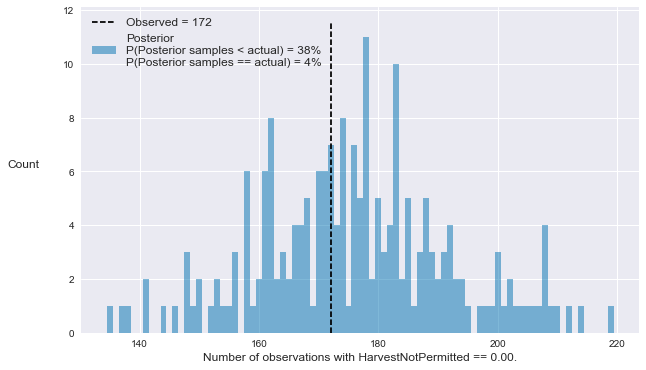

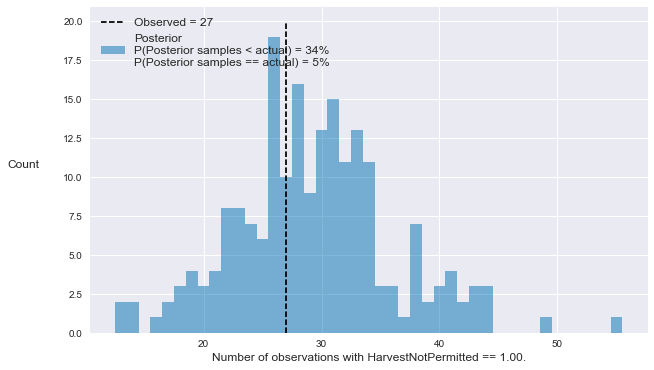

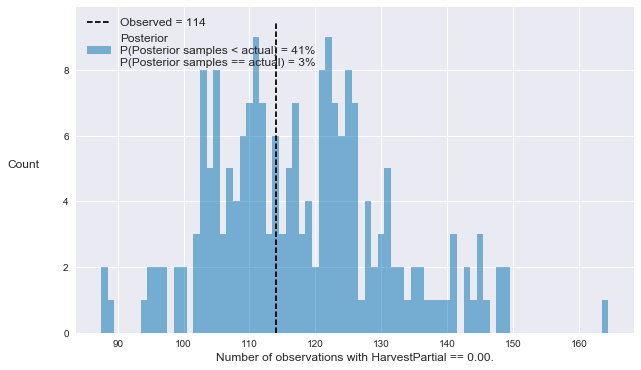

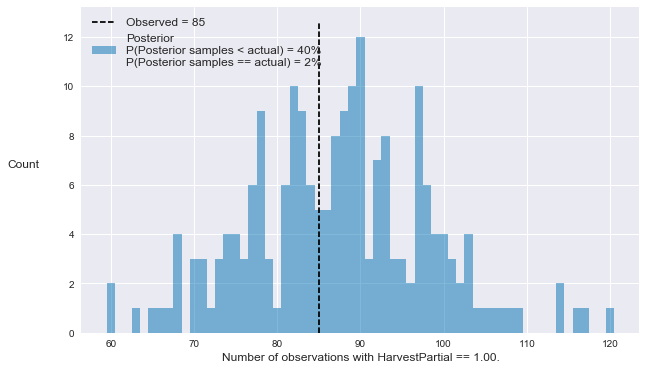

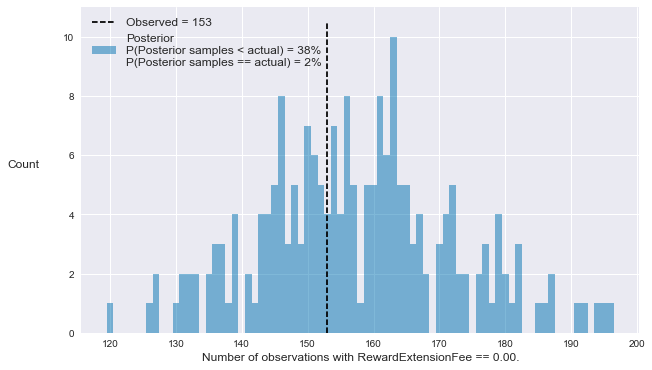

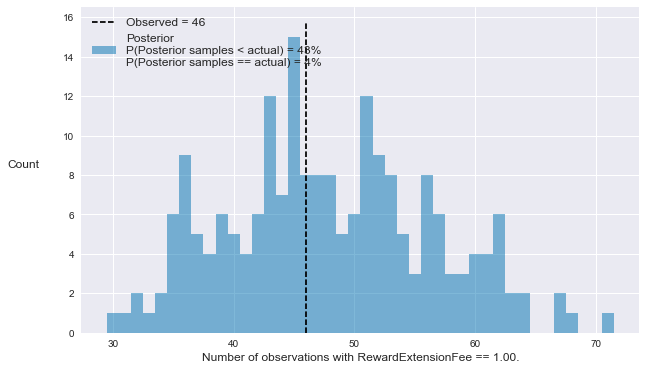

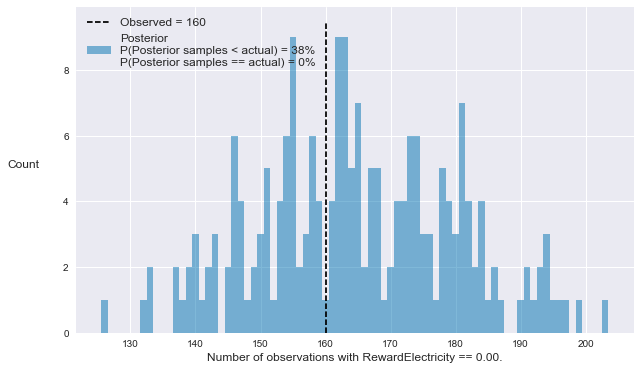

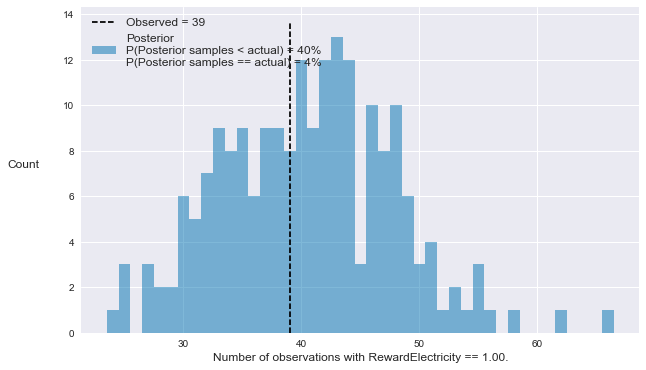

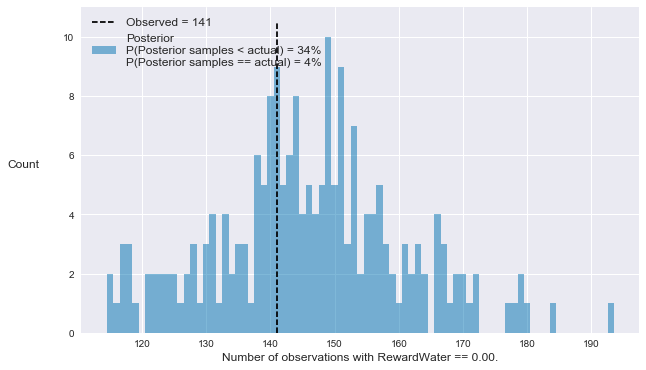

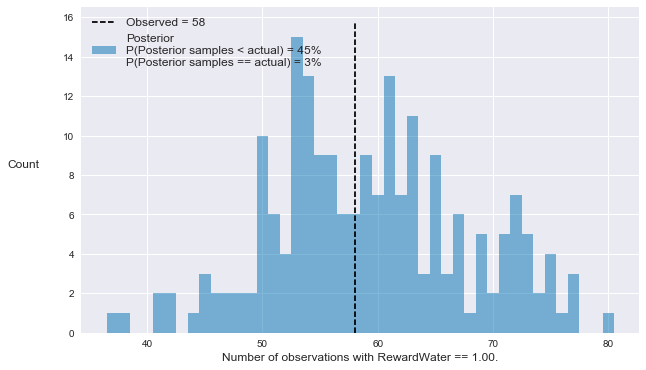

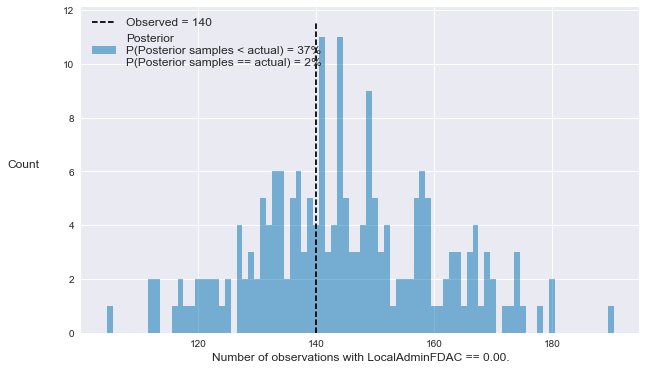

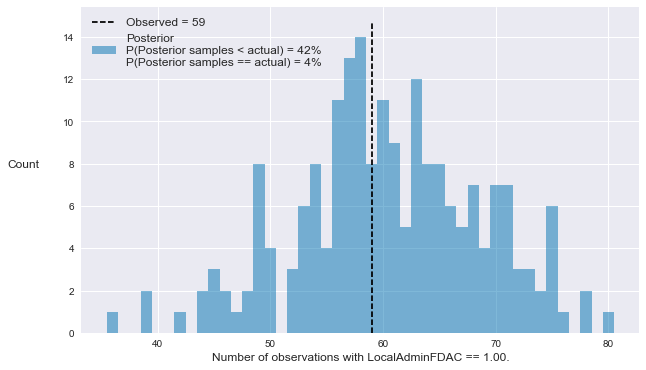

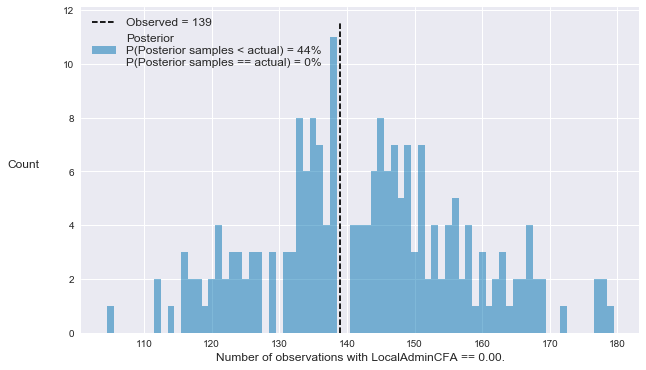

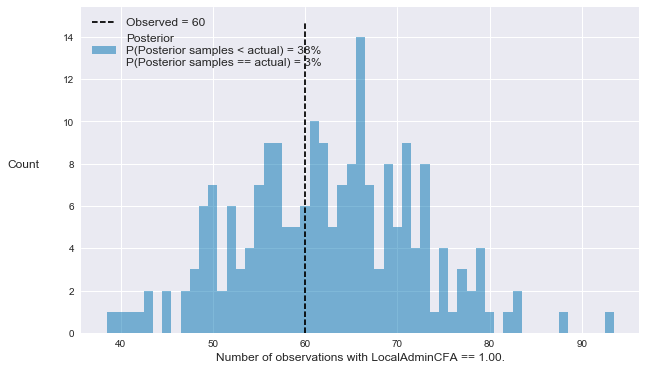

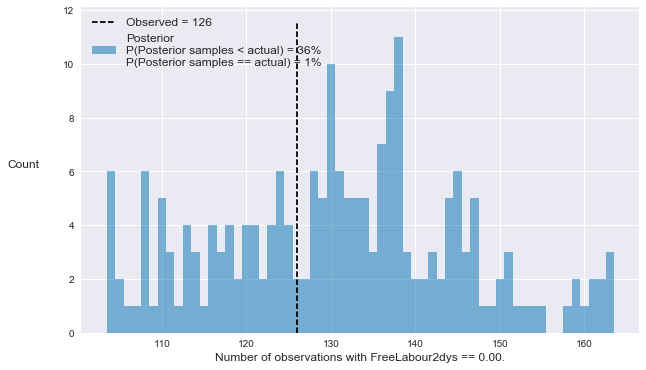

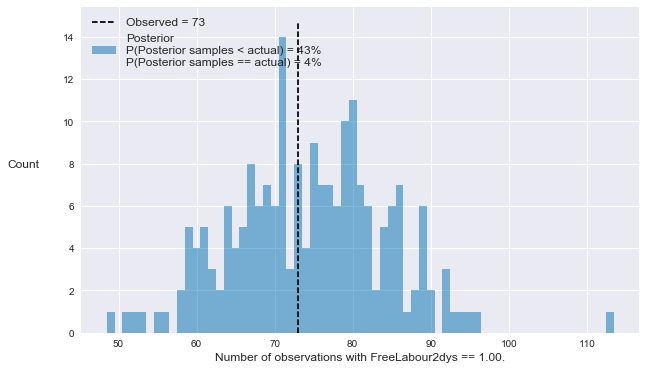

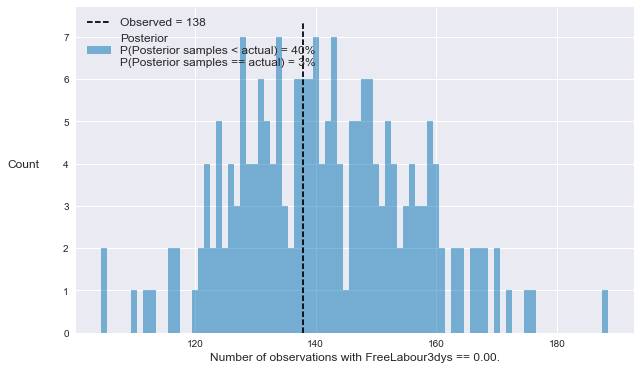

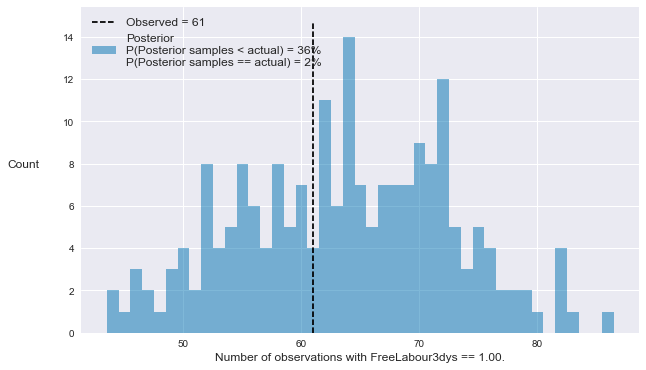

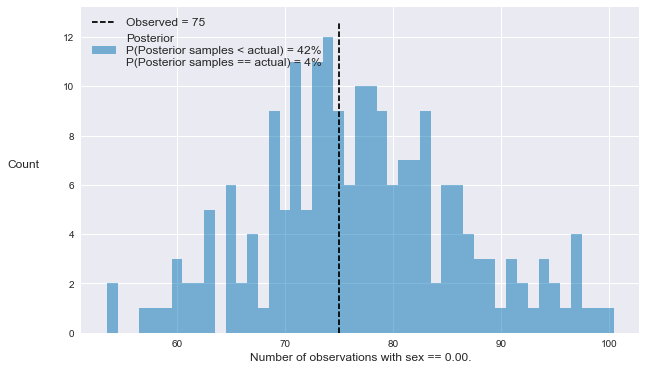

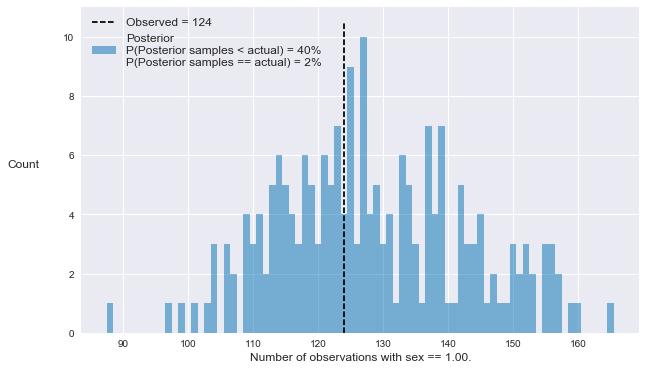

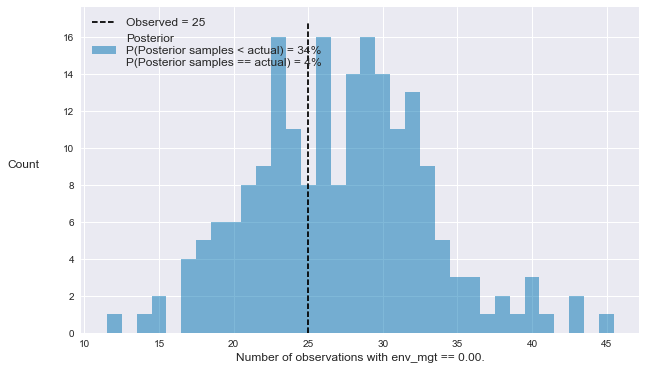

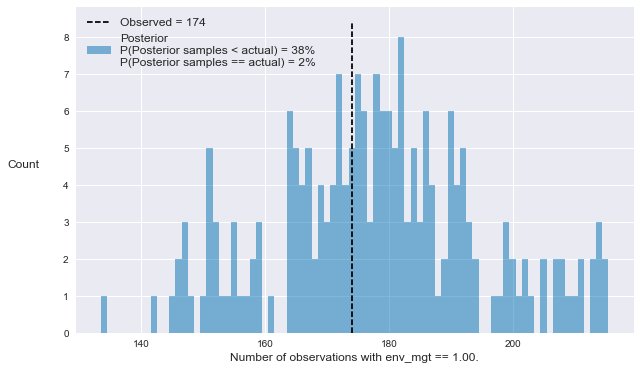

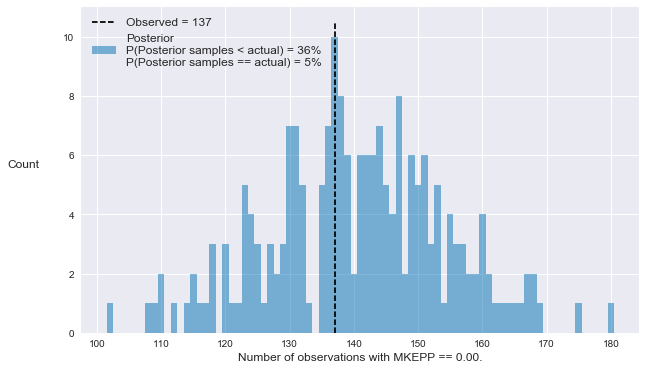

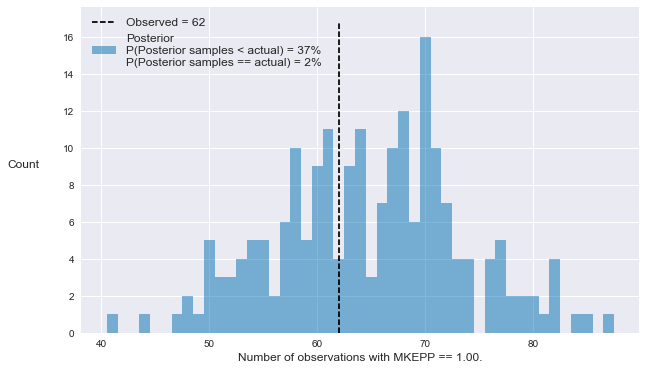

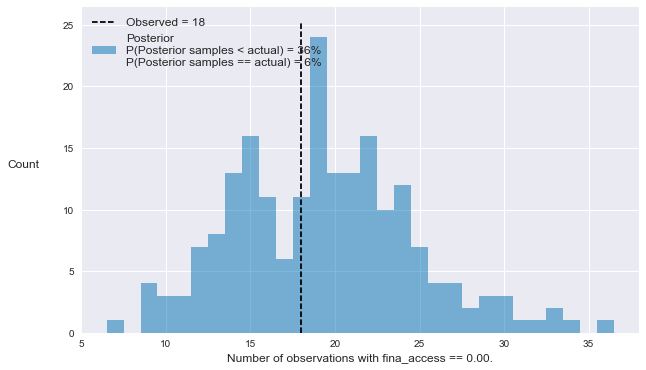

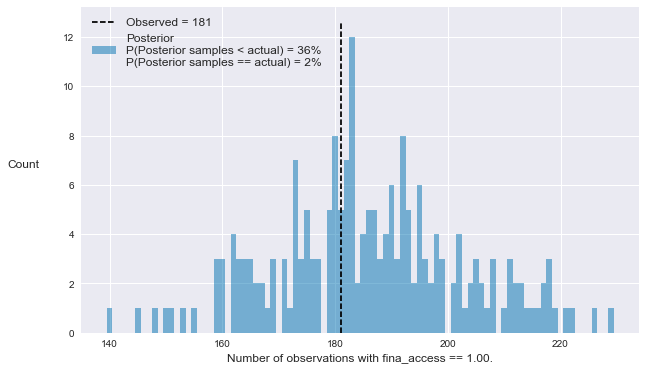

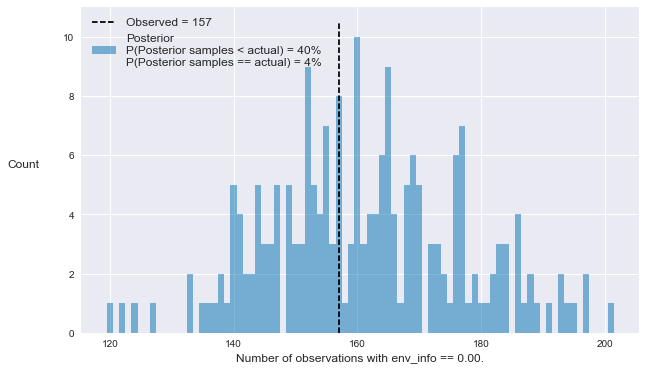

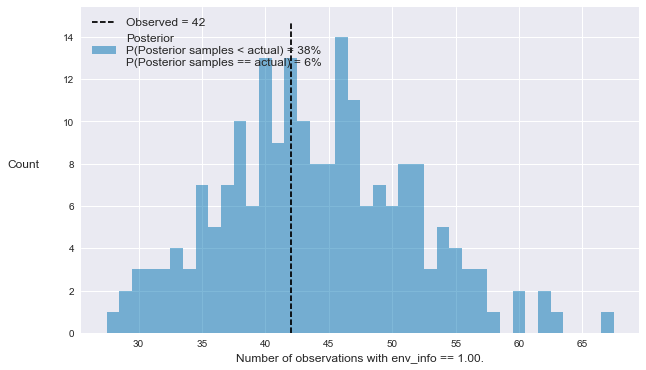

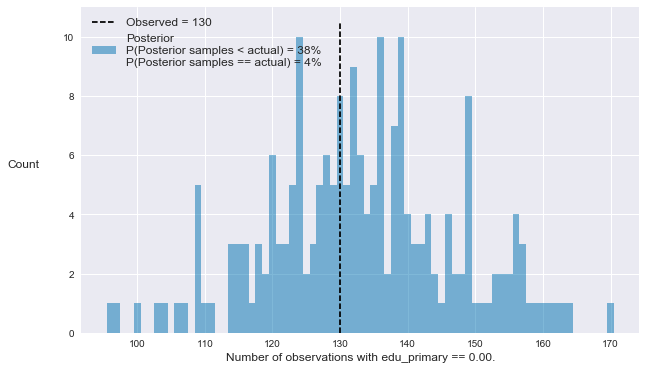

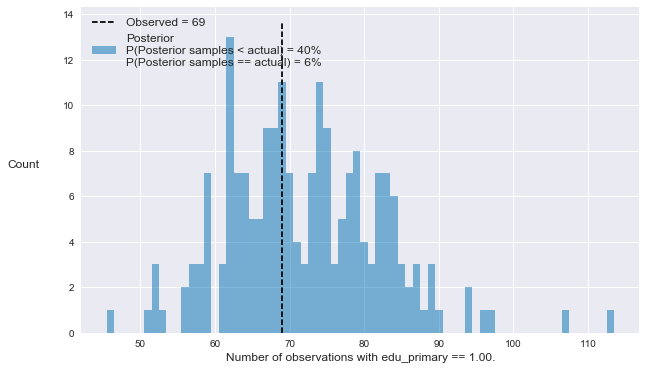

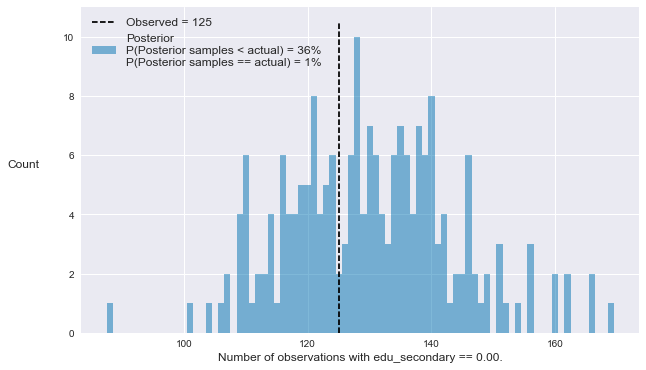

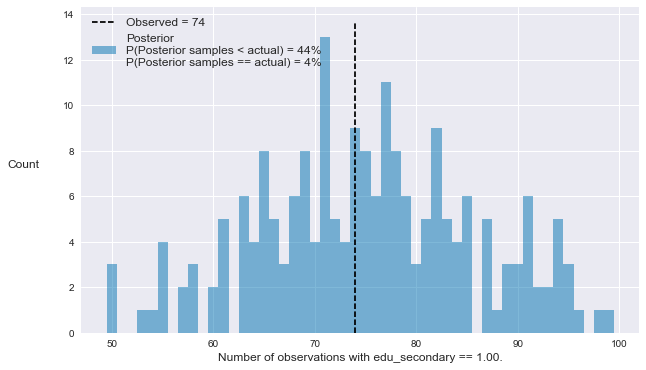

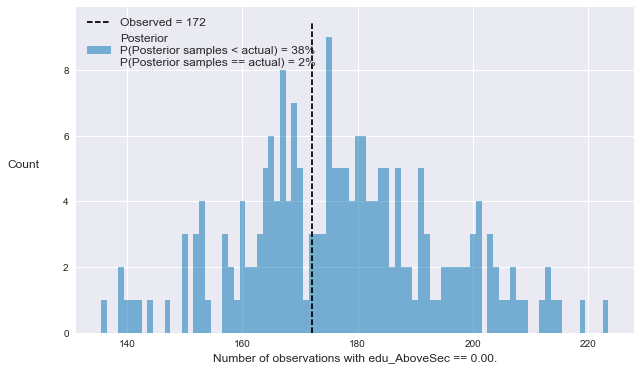

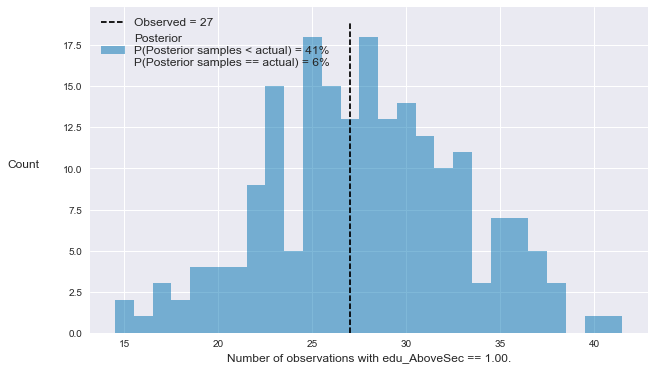

In [38]:
%pdb on
filter_row = np.ones(num_obs).astype(bool)
current_title = ''
filename = None

for col in binary_variables:
    viz.plot_categorical_predictive_densities(
        clean_df,
        None,
        simulated_choices,
        col,
        filter_row,
        clean_df.BinaryChoice.values.astype(int),
        title=current_title,
        filter_name='observations',
        post_color=sbn.color_palette('colorblind')[0],
        figsize=(10, 6),
        legend_loc='upper left',
        output_file=filename)

###  10. Simulated Lagrange Multiplier tests for mixing

# Findings and Recommendations based on the posterior predictive checks

1. The variable names in the results table do not match the variable names in the data file. We do not know why. It is not clear whether the data file, results table, or both are incorrect.
2. The simulated log-predictive plots indicate great model mis-specification. The log-likelihood of the real data is far worse than would be expected if the data was generated by the hypothesized model.
3. Based on the bagged marginal model plot, hhsize = 1 needs to be a dummy variable of its own.
4. Based on the fact that the simulated reliability curves do not lie around the refernce line, and the fact that the marginal model plot of the index ($V = X \beta$) is not calibrated where it should be (e.g. the probabilities are not centered around 0.5 when v = 0), I think the model's link function is mis-specified.
5. The simulated KDEs show that basically all of the continuous variables need to be treated more flexibly.
6. As expected, the simulated histograms of binary variables that are included in the specification do not show any obvious lack of fit.